<a href="https://colab.research.google.com/github/mahaswetabhattacharya24/imdb_datasets/blob/main/imdb_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
from keras import optimizers
opt = optimizers.RMSprop(learning_rate=0.001, momentum=0.9, decay=0.01)

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=opt,loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.4340 - acc: 0.7987 - val_loss: 0.3360 - val_acc: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1881 - acc: 0.9299 - val_loss: 0.2996 - val_acc: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1126 - acc: 0.9630 - val_loss: 0.3405 - val_acc: 0.8824
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0672 - acc: 0.9807 - val_loss: 0.4355 - val_acc: 0.8737
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0367 - acc: 0.9912 - val_loss: 0.5041 - val_acc: 0.8745
Epoch 6/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0174 - acc: 0.9974 - val_loss: 0.5997 - val_acc: 0.8742
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0072 - acc: 0.9990 - val_loss: 0.7154 - val_acc: 0.8726
Epoch 8/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0030 - a

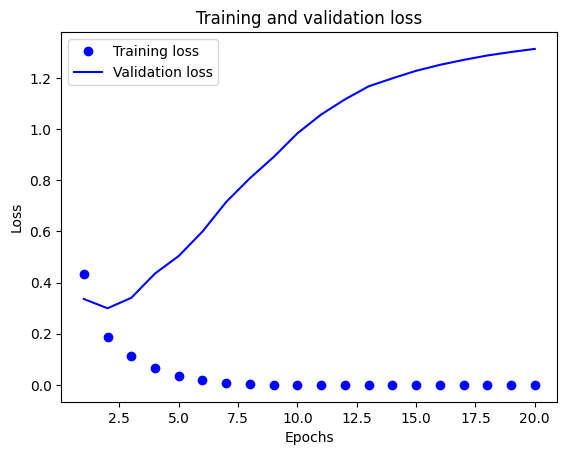

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

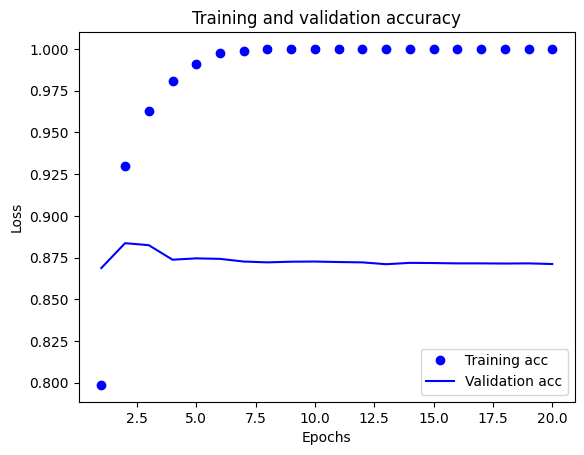

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_val_predict = model.predict(x_val)
for i in range(len(y_val_predict)):
    if y_val_predict[i,0] != 1:
        y_val_predict[i,0] = 0
      

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix( y_val, y_val_predict)

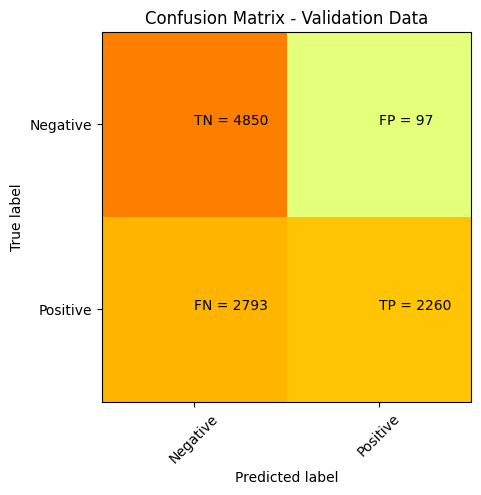

In [ ]:
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Validation Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm1[i][j]))
plt.show()

In [ ]:
y_test_predict = model.predict(x_test)
for i in range(len(y_test_predict)):
    if y_test_predict[i,0] != 1:
        y_test_predict[i,0] = 0

782/782 [==============================] - 2s 2ms/step


In [ ]:
cm2 = confusion_matrix( y_test, y_test_predict)

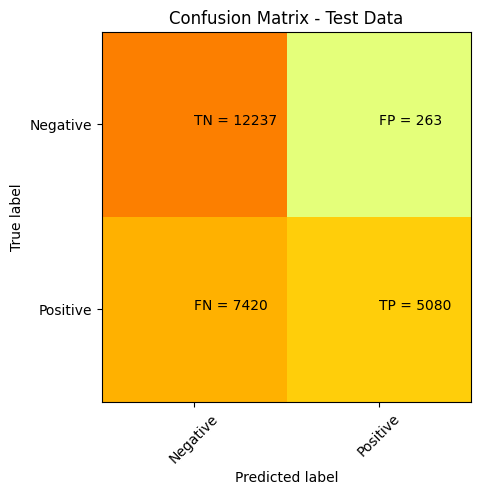

In [ ]:
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

